
# Housing Price Classification: Creating an intuition-based model
---



# Explanation of the features

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

1. Data reading & first glance

In [ ]:
import pandas as pd

url = "https://drive.google.com/file/d/1P5-3duf5x4zSoL0H3Bz0f45aWoAxV7zK/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.head(3)




,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0


The target column denoted as y and is called a label. "pop" it out from the rest of the data:

In [ ]:
y = data.pop("Expensive")

In [ ]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

0: The house is not considered expensive

1: The house is considered expensive

# 2. Basic Exploration

In [ ]:
X = data

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [ ]:
X.isna().sum()

,0
LotArea,0
LotFrontage,259
TotalBsmtSF,0
BedroomAbvGr,0
Fireplaces,0
PoolArea,0
GarageCars,0
WoodDeckSF,0
ScreenPorch,0


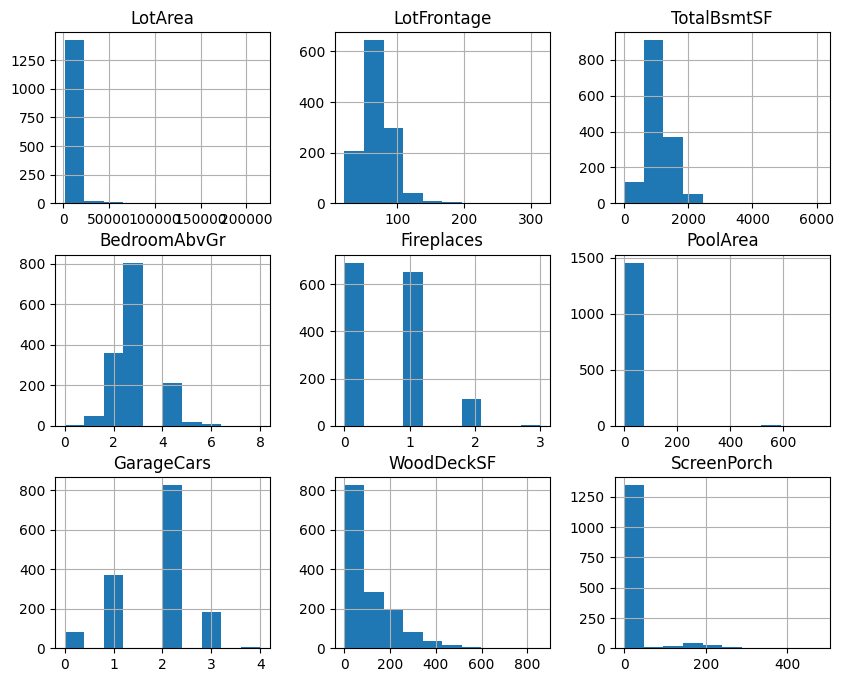

In [ ]:
X.hist(figsize=(10, 8));

# Overall Influence on House Prices

Higher LotArea, TotalBsmtSF, and GarageCars capacities are indicators of larger properties, which typically increase property value due to the space and usability they add.

Amenities like Fireplaces, PoolArea, WoodDeckSF, and ScreenPorch contribute positively to house prices by offering additional comfort or luxury features.

Features such as LotFrontage and BedroomAbvGr offer less direct influence but contribute to livability and appeal, which indirectly influences price.

# 3. Train-test split

Before performing a deeper exploration, I will split the dataset into 2 chunks: train and test. I will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for the model, it will let us know whether the model is able to generalize.

Here, I'm using the function train_test_split to shuffle the observations randomly and create the train and test sets for both the X and the y objects at the same time, ensuring that they are shuffled the same way:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [ ]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,7819,94.0,1029,3,1,0,2,144,0
157,12003,92.0,774,4,1,0,3,0,0
360,7540,NaN,888,2,1,0,2,0,192
744,5395,41.0,1337,2,1,0,2,96,0
150,10356,120.0,969,3,0,0,2,0,0


In [ ]:
y_train.head()

,Expensive
772,0
157,1
360,0
744,0
150,0


In [ ]:
X_test.head()

In [ ]:
y_test.head()

# 4. Iteration 0 - An intuition-based model

Machine Learning models should never be the first option to solve any problem. Machine Learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company has built following simple rules, common sense or gained expertise.

Therefore, the first step when solving any problem should be to create a simple  working solution and learn to evaluate it. In our example: how well can we predict expensive with an extremely simple rule?

Let's start by suggesting that every house is not expensive. I will call this "model" the "pessimistic" one, and use it to make predictions for both the train and the test set:

In [ ]:
y_train.value_counts()

,count
Expensive,
0,989
1,179


In [ ]:
len(y_train)

1168

Our predictions for the train set will be just 1168 zeros:

In [ ]:
pred_pessimistic_train = pd.Series(0, index=range(1168))

 How good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted passengers. This metric is called accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )

round(train_accuracy, 2)

0.85

I have about a 85% accuracy in our train set. Let's find out how would have it done in our test set:

In [ ]:
len(y_test)

292

In [ ]:
pred_pessimistic_test = pd.Series(0, index=range(292))

In [ ]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pessimistic_test
                               )

round(test_accuracy, 2)

0.87

# The optimistic baseline and rule-based prediction:



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Optimistic baseline predictions (all houses predicted as "expensive")
pred_optimistic_train = pd.Series(1, index=range(len(y_train)))
pred_optimistic_test = pd.Series(1, index=range(len(y_test)))

# Rule-based predictions: "expensive" if BedroomAbvGr > 3 and GarageCars > 2
train_rule_based_pred = ((X_train['BedroomAbvGr'] > 3) & (X_train['GarageCars'] > 2)).astype(int)
test_rule_based_pred = ((X_test['BedroomAbvGr'] > 3) & (X_test['GarageCars'] > 2)).astype(int)

# Calculate accuracy for both optimistic baseline and rule-based predictions
train_accuracy_optimistic = accuracy_score(y_train, pred_optimistic_train)
test_accuracy_optimistic = accuracy_score(y_test, pred_optimistic_test)

train_accuracy_rule_based = accuracy_score(y_train, train_rule_based_pred)
test_accuracy_rule_based = accuracy_score(y_test, test_rule_based_pred)

# Display results
print("Optimistic Baseline - Training Accuracy:", round(train_accuracy_optimistic, 2))
print("Optimistic Baseline - Test Accuracy:", round(test_accuracy_optimistic, 2))
print("Rule-Based - Training Accuracy:", round(train_accuracy_rule_based, 2))
print("Rule-Based - Test Accuracy:", round(test_accuracy_rule_based, 2))


Optimistic Baseline - Training Accuracy: 0.15
Optimistic Baseline - Test Accuracy: 0.15
Rule-Based - Training Accuracy: 0.87
Rule-Based - Test Accuracy: 0.86


# **Optimizing the scores**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize a Random Forest with balanced class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predictions
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

# Evaluate
print("Training Set Performance:")
print(classification_report(y_train, train_pred))
print("Test Set Performance:")
print(classification_report(y_test, test_pred))
print("AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       1.00      0.99      1.00       179

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168

Test Set Performance:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       254
           1       0.83      0.66      0.74        38

    accuracy                           0.94       292
   macro avg       0.89      0.82      0.85       292
weighted avg       0.94      0.94      0.94       292

AUC-ROC: 0.9316203895565687
